In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import psycopg2
import pandas as pd
import psycopg2.extras
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="prescription_data_db",
                                           user = "postgres",
                                           password = "mudabbir",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection
    
    
con = PostgresConnection().getConnection()

Connection to DB established!


# 

### Which drug ingredients or type of appliances are prescribed the most?

In [3]:
con = PostgresConnection().getConnection()
cur = con.cursor()

insert_stmt = """SELECT chemical_substance_bnf_descr, SUM(TOTAL_QUANTITY) as Total_Quantity
                FROM epd_snow.fact_table as f
                INNER JOIN epd_snow.prescription as p ON p.prescription_key = f.prescription_key
                INNER JOIN epd_snow.bnf_chemical as b ON b.bnf_chemical_substance = p.bnf_chemical_substance
                GROUP BY chemical_substance_bnf_descr
                ORDER BY Total_Quantity desc"""
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
Total_Quantity_df = pd.DataFrame(list(records), columns=['Ingredient / Appliance', 'Total Quantity'])
Total_Quantity_df

Connection to DB established!


Ingredient / Appliance Total Quantity
0                            Enteral nutrition     21864044.0
1                      Methadone hydrochloride      6407443.0
2                                   Emollients      3867251.0
3     Other food for special diet preparations      2970488.0
4           Alginic acid compound preparations      2499807.0
...                                        ...            ...
1063        Measles, mumps and rubella vaccine            1.0
1064                        Octreotide acetate            1.0
1065                           Cervical Collar            1.0
1066                               Ster larvae            1.0
1067                                Lanreotide            1.0

[1068 rows x 2 columns]

In [4]:
Total_Quantity_df = Total_Quantity_df.head(20)

In [5]:
def changetype_to_int(df, col):
    df[col]=df[col].astype('int64')

In [6]:
changetype_to_int(Total_Quantity_df, 'Total Quantity')

C:\Users\Acer\AppData\Local\Temp\ipykernel_4788\1351452570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].astype('int64')


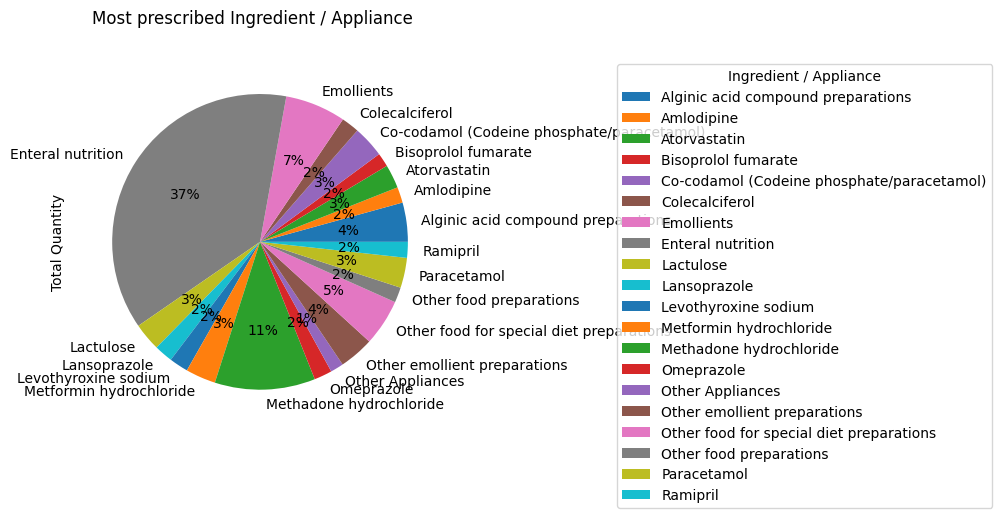

In [13]:
Total_Quantity_df.groupby(['Ingredient / Appliance']).sum().plot.pie(subplots = True, title='Most prescribed Ingredient / Appliance', autopct='%1.0f%%')
plt.legend(bbox_to_anchor=(2.5, 1), loc='upper right', title='Ingredient / Appliance')

### Which drug ingredients or type of appliances are sold the most?

In [7]:
con = PostgresConnection().getConnection()
cur = con.cursor()

insert_stmt = """SELECT chemical_substance_bnf_descr, SUM(actual_cost) as Total_Sales
                FROM epd_snow.fact_table as f
                INNER JOIN epd_snow.prescription as p ON p.prescription_key = f.prescription_key
                INNER JOIN epd_snow.bnf_chemical as b ON b.bnf_chemical_substance = p.bnf_chemical_substance
                GROUP BY chemical_substance_bnf_descr
                ORDER BY Total_Sales desc"""
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
Total_Sales_df = pd.DataFrame(list(records), columns=['Ingredient / Appliance', 'Total Sales'])
Total_Sales_df

Connection to DB established!


Ingredient / Appliance   Total Sales
0                       Apixaban  392459.48363
1     Beclometasone dipropionate  310867.54887
2              Enteral nutrition  270262.47018
3                      Catheters  207576.64680
4                    Rivaroxaban  187839.58005
...                          ...           ...
1063    Paracetamol and caffeine       2.04227
1064   Naphazoline hydrochloride       2.00431
1065           Absorbent Cottons       1.69827
1066                     Alcohol       1.10215
1067        Chiropody Appliances       1.04146

[1068 rows x 2 columns]

In [8]:
Total_Sales_df = Total_Sales_df.head(50)

In [9]:
def changetype_to_int(df, col):
    df[col]=df[col].astype('float64')

In [10]:
changetype_to_int(Total_Sales_df, 'Total Sales')

C:\Users\Acer\AppData\Local\Temp\ipykernel_4788\4233268188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=df[col].astype('float64')


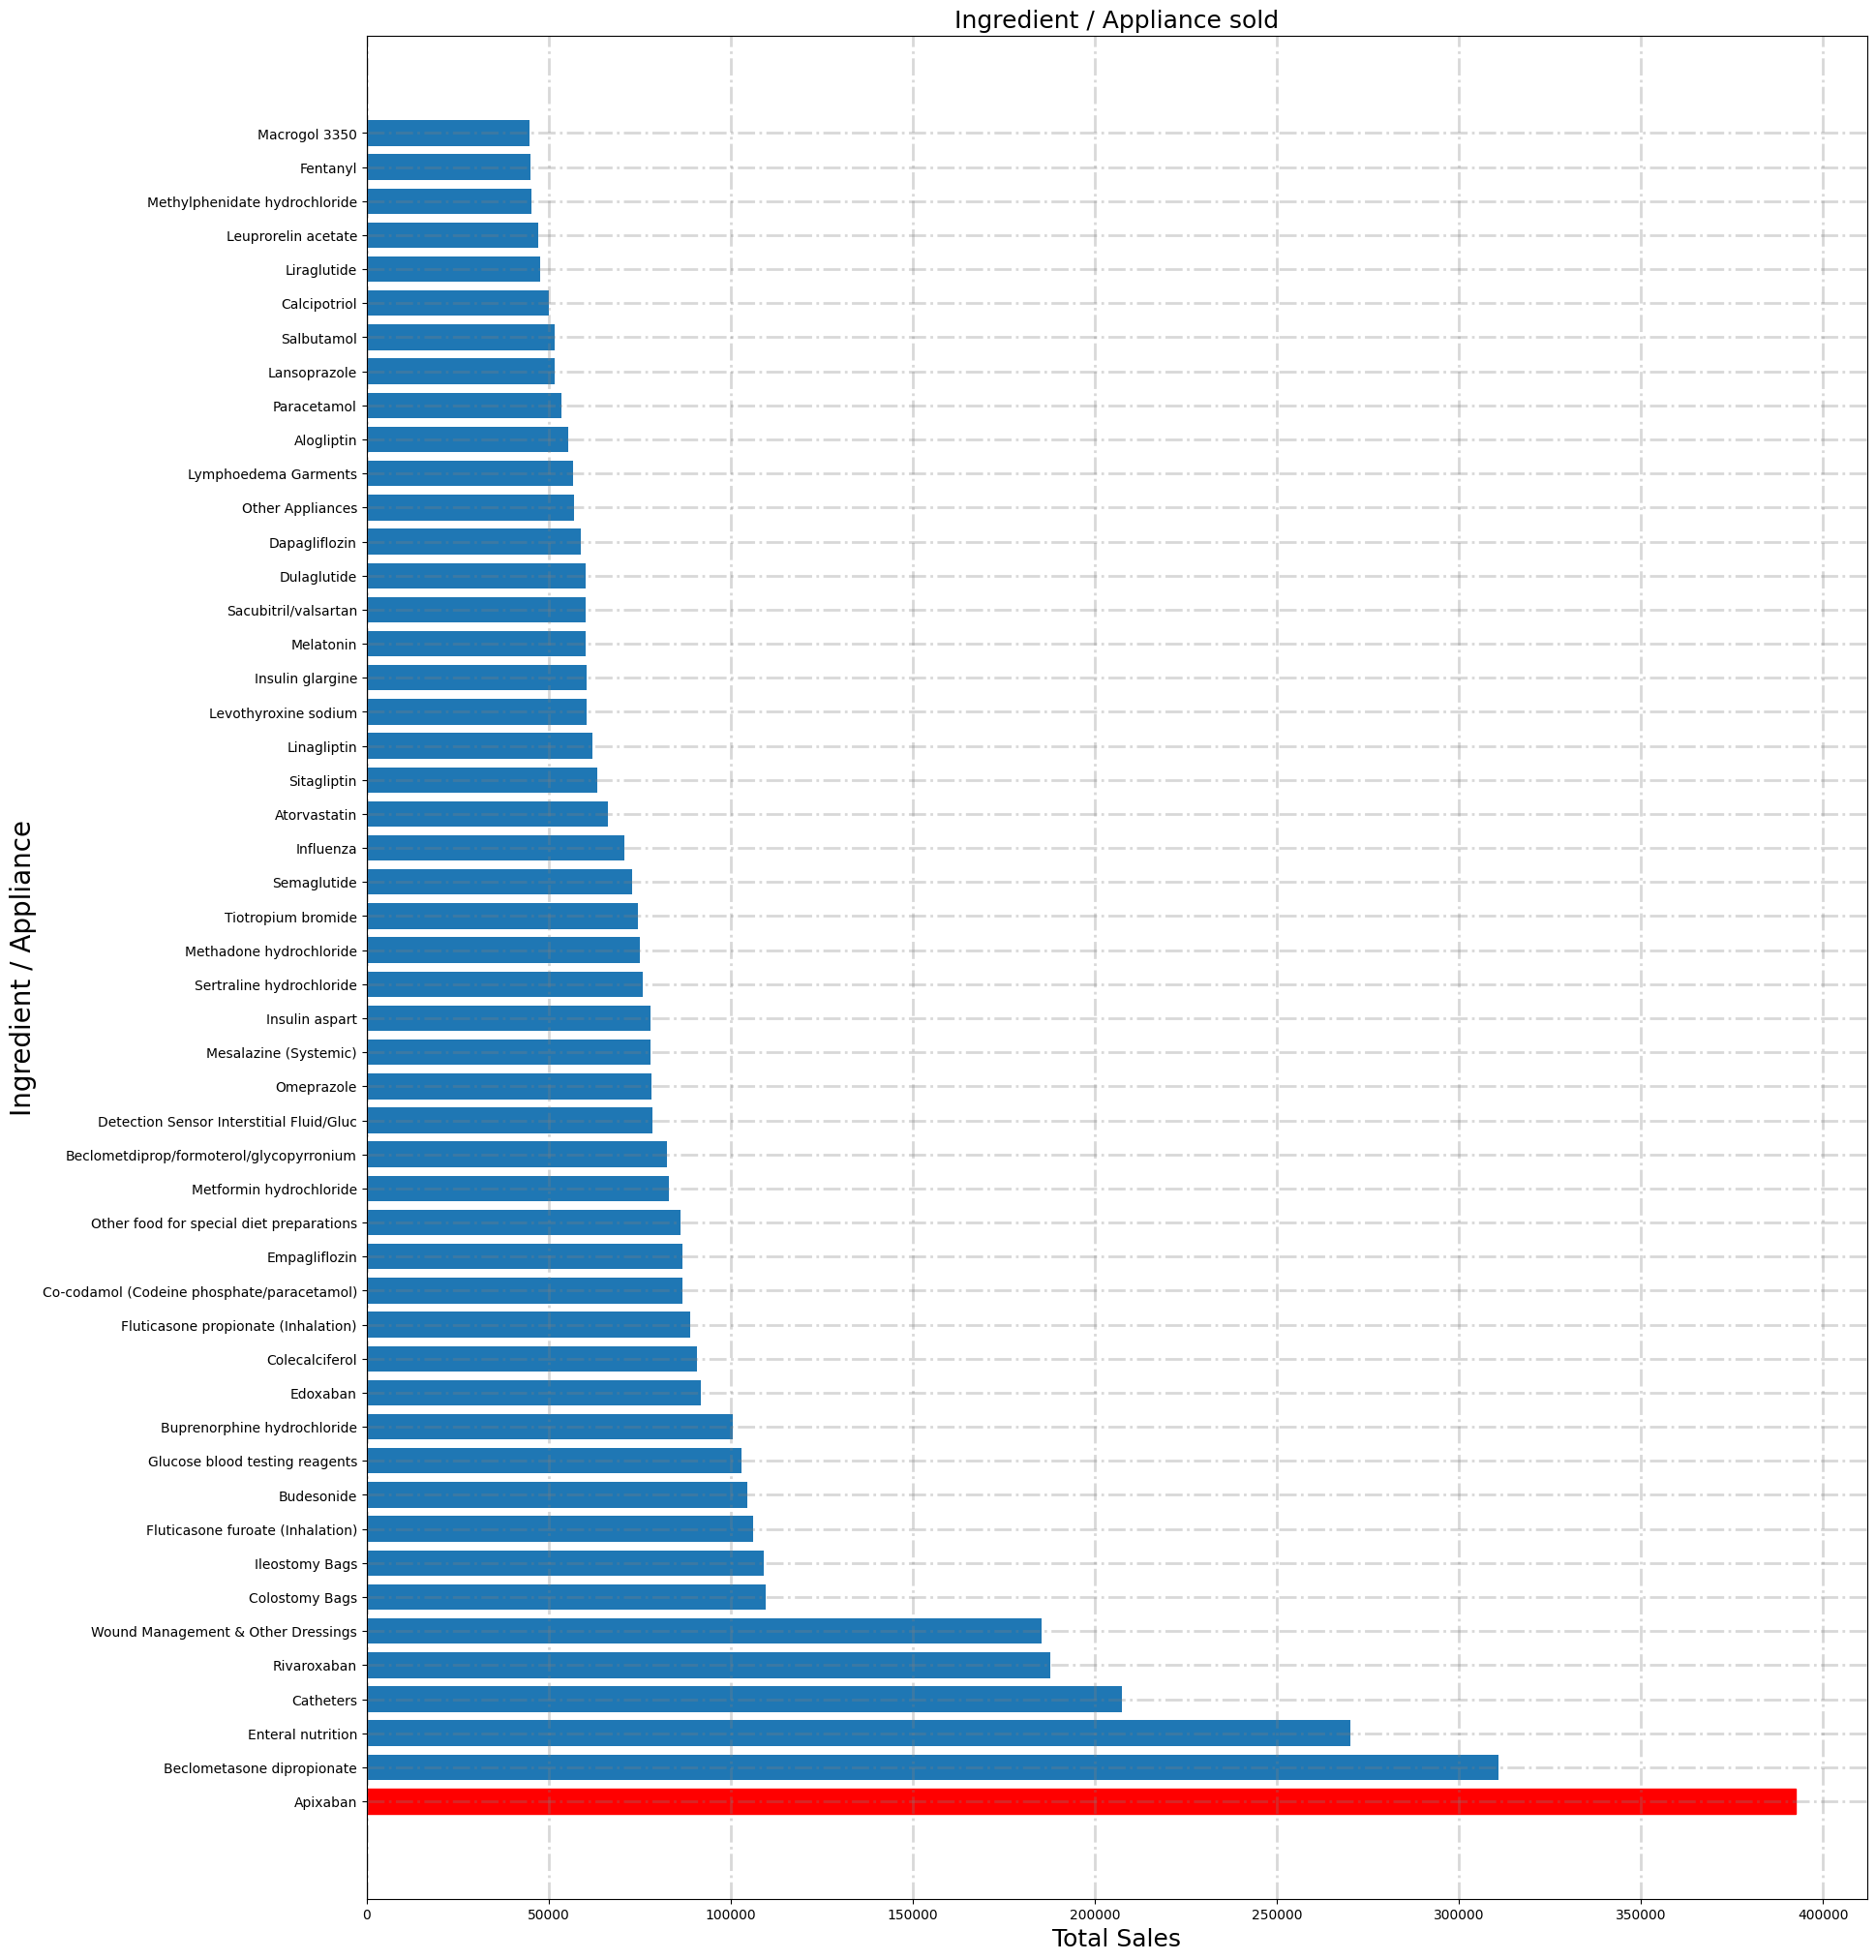

In [11]:
plt.figure(figsize = (20, 25))
bar=plt.barh(Total_Sales_df['Ingredient / Appliance'],Total_Sales_df['Total Sales'], height=0.75)
bar[0].set_color('r')
plt.grid(visible=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
plt.title('Ingredient / Appliance sold' , fontsize=18)
plt.xlabel('Total Sales', fontsize=18)
plt.ylabel('Ingredient / Appliance', fontsize=20)
plt.show()

### Which Primary Care Organization, PCO have made the most sales?

In [12]:
con = PostgresConnection().getConnection()
cur = con.cursor()

insert_stmt = """SELECT PCO_NAME, SUM(actual_cost) as Total_Sales
                FROM epd_snow.fact_table as f
                INNER JOIN epd_snow.location as l ON l.location_key = f.location_key
                GROUP BY PCO_NAME
                ORDER BY Total_Sales desc"""
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
pco_Total_Sales_df = pd.DataFrame(list(records), columns=['PCO', 'Total Sales'])
pco_Total_Sales_df

Connection to DB established!


PCO   Total Sales
0                     NORTH LINCOLNSHIRE CCG  834348.40812
1                           VALE OF YORK CCG  563073.88894
2                NORTH EAST LINCOLNSHIRE CCG  478189.96509
3                 BASILDON AND BRENTWOOD CCG  463932.67458
4                                   BURY CCG  390403.14528
..                                       ...           ...
296  WARRINGTON & HALTON TEACHING HOSP NHSFT       2.22085
297                     THE SOLENT NHS TRUST       1.66257
298                         LINCOLNSHIRE STP       1.17729
299               ONE ASHFORD HEALTHCARE LTD       0.85405
300                                FRAMEWORK       0.20567

[301 rows x 2 columns]

In [13]:
changetype_to_int(pco_Total_Sales_df, 'Total Sales')

In [14]:
pco_Total_Sales_df = pco_Total_Sales_df.head(20)

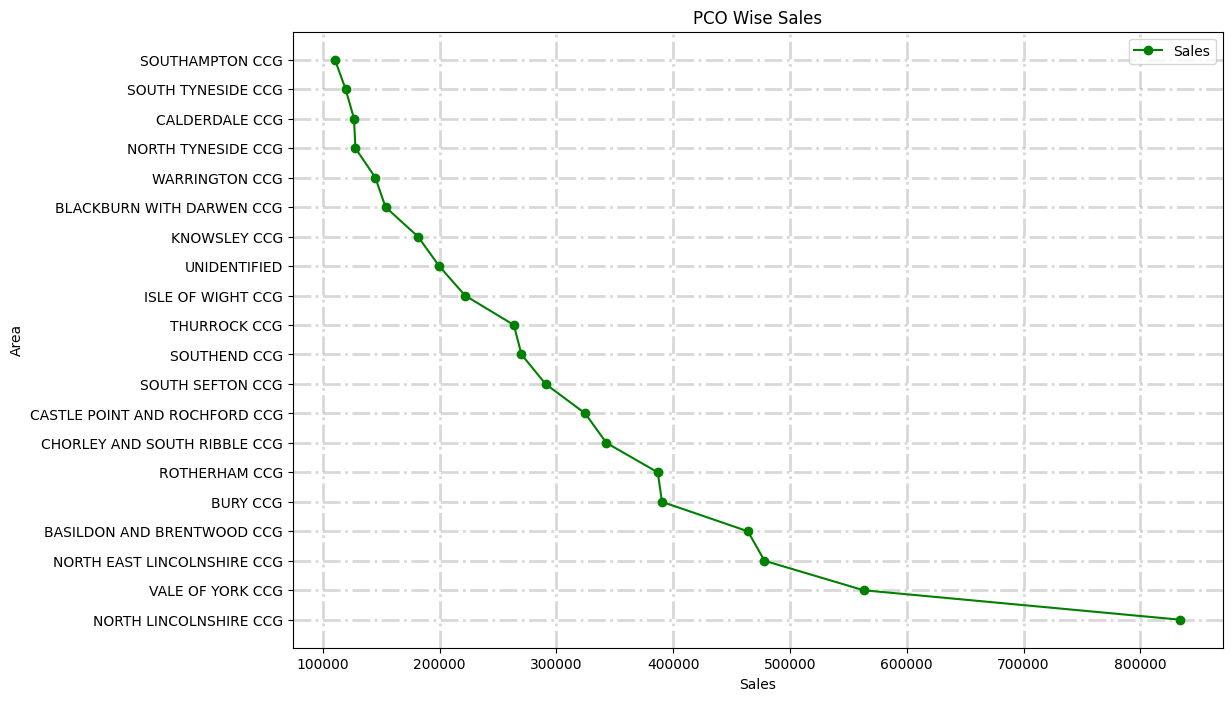

In [15]:
plt.figure(figsize = (12, 8))
plt.title('PCO Wise Sales')
plt.xlabel('Sales', fontsize=10)
plt.ylabel('Area', fontsize=10)
x=pco_Total_Sales_df['Total Sales']
y=pco_Total_Sales_df['PCO']
plt.grid(visible=True, color='grey', alpha=0.3, linestyle='-.', linewidth=2)
plt.plot(x, y, color = 'g', linestyle = 'solid', marker = 'o', label = "Sales")
plt.legend()
plt.show()

### Monthly average sales of 2020, 2021, 2022 combined

In [16]:
con = PostgresConnection().getConnection()
cur = con.cursor()

insert_stmt = """SELECT month, AVG(actual_cost) as Total_Sales
                FROM epd_snow.fact_table as f
                INNER JOIN epd_snow.time as t ON t.time_key = f.time_key
                GROUP BY month
                ORDER BY Month """
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
Monthly_Total_Sales_df = pd.DataFrame(list(records), columns=['Month', 'Total Sales'])
Monthly_Total_Sales_df

Connection to DB established!


Month          Total Sales
0       1  40.7127937895684353
1       2  39.9429641406210932
2       3  47.2870105635845377
3       4  42.5769935945000000
4       5  42.6937736065000000
5       6  41.5719987334366718
6       7  44.5026372687268727
7       8  43.9631760166016602
8       9  43.4486698449844984
9      10  44.9886183038303830
10     11  46.8930068426842684
11     12  44.0788246952347617

In [17]:
def changetype_to_int(df, col):
    df[col]=df[col].astype('int64')

In [18]:
changetype_to_int(Monthly_Total_Sales_df, 'Total Sales')

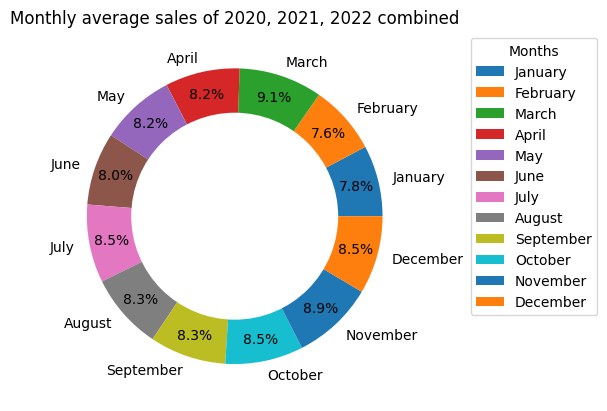

In [19]:
sizes = Monthly_Total_Sales_df['Total Sales']

# Setting labels for items in Chart
labels =['January', 'February', 'March', 'April', 'May', 'June', 'July', 
         'August', 'September', 'October', 'November', 'December'] 

# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F',
		'#FFA500']

# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)

# Pie Chart
plt.pie(sizes, labels=labels,
		autopct='%1.1f%%', pctdistance=0.85)

# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Monthly average sales of 2020, 2021, 2022 combined')

# Add Legends
plt.legend(labels, bbox_to_anchor=(1.5, 1), loc="upper right", title="Months")

# Displaying Chart
plt.show()

### Yearly sales

In [20]:
con = PostgresConnection().getConnection()
cur = con.cursor()

insert_stmt = """SELECT t.year,t.month, SUM(f.actual_cost) as Total_Sales
                FROM epd_snow.fact_table as f
                INNER JOIN epd_snow.time as t ON t.time_key = f.time_key
                GROUP BY t.year,t.month
                ORDER BY Year """
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
YearMonth_Total_Sales_df = pd.DataFrame(list(records), columns=['Year','Month', 'Total Sales'])
YearMonth_Total_Sales_df

Connection to DB established!


Year  Month   Total Sales
0   2020     11  482433.71740
1   2020     12  457361.87619
2   2021      1  402608.29891
3   2021      2  397008.56258
4   2021      3  521415.52509
5   2021      4  421985.94144
6   2021      5  424708.87082
7   2021      6  429192.86299
8   2021      7  444080.43125
9   2021      8  439587.79699
10  2021      9  434443.24978
11  2021     10  449841.19442
12  2021     11  455332.63344
13  2021     12  424170.53889
14  2022      1  411525.43850
15  2022      2  401730.89134
16  2022      3  424182.82515
17  2022      4  429553.93045
18  2022      5  429166.60131
19  2022      6  402205.53968
20  2022      7  445883.30885

In [21]:
changetype_to_int(YearMonth_Total_Sales_df, 'Total Sales')

<AxesSubplot:title={'center':'Yearly sales'}, xlabel='Year', ylabel='Total Sales'>

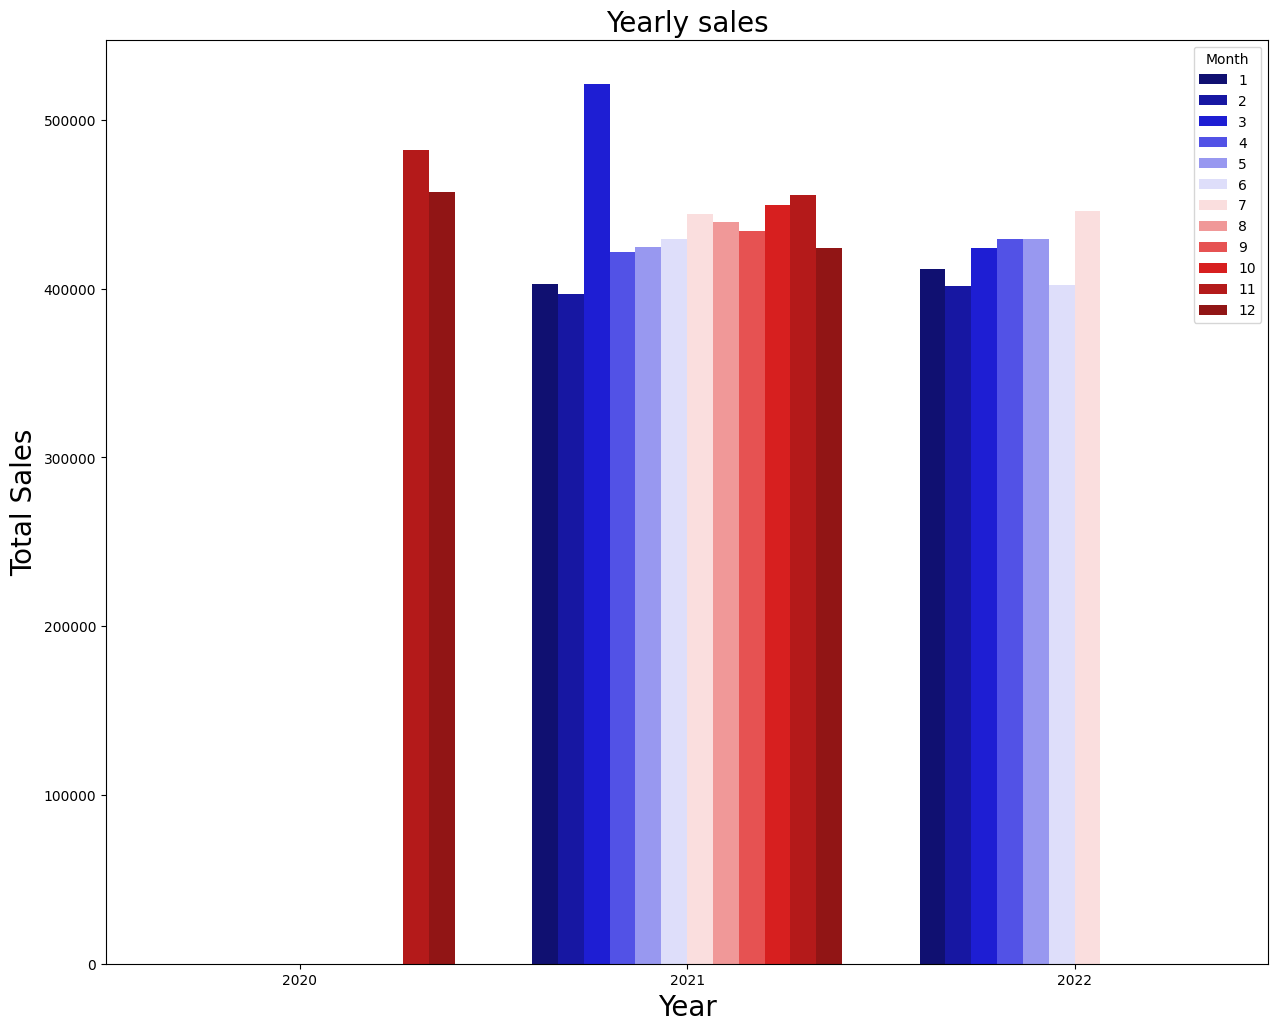

In [22]:

a_dims = (15, 12)
fig, ax = plt.subplots(figsize=a_dims)
#sns.set(font_scale = 1)
plt.title('Yearly sales',fontsize=20)
plt.xlabel('Year',fontsize=20)
plt.ylabel('Sales',fontsize=20)

#sns.set_style("darkgrid")
#sns.axes_style("white")
sns.barplot(data=YearMonth_Total_Sales_df,x='Year',y='Total Sales',hue='Month',ax=ax,palette='seismic')

### Service centre sales

In [23]:
con = PostgresConnection().getConnection()
cur = con.cursor()

insert_stmt = """SELECT s.practice_name, SUM(f.actual_cost) as Total_Sales
                FROM epd_snow.fact_table as f
                INNER JOIN epd_snow.service as s ON s.practice_code = f.practice_code
                GROUP BY s.practice_name
                ORDER BY Total_Sales desc"""
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
Service_Total_Sales_df = pd.DataFrame(list(records), columns=['Service', 'Total Sales'])
Service_Total_Sales_df

Connection to DB established!


Service   Total Sales
0                     HAXBY GROUP PRACTICE  344985.68757
1                     UNIDENTIFIED DOCTORS  209758.33134
2                  ANCORA MEDICAL PRACTICE  159862.29859
3                DINNINGTON GROUP PRACTICE  133948.81607
4          CAMBRIDGE AVENUE MEDICAL CENTRE  132513.18949
...                                    ...           ...
1389                SRC COMMUNITY SERVICES        0.5708
1390            DONCASTER CLOZAPINE CLINIC       0.30773
1391  PORTSMOUTH PRIMARY CARE ALLIANCE LTD       0.29941
1392                                CCCT 2       0.28079
1393                      EDWIN HOUSE IPDU       0.20567

[1394 rows x 2 columns]

In [24]:
changetype_to_int(Service_Total_Sales_df, 'Total Sales')

### Service centre visits

In [92]:
con = PostgresConnection().getConnection()
cur = con.cursor()

insert_stmt = """SELECT s.practice_name, COUNT(s.practice_name)
FROM epd_snow.fact_table as f
INNER JOIN epd_snow.service as s ON s.practice_code = f.practice_code
GROUP BY s.practice_name
ORDER BY COUNT(s.practice_name) DESC"""

cur.execute(insert_stmt)
records = cur.fetchall()
service_df = pd.DataFrame(list(records), columns=['Service Name', 'Count'])
service_df.drop(service_df[(service_df['Service Name'] == 'UNIDENTIFIED DOCTORS')].index, inplace=True)
service_df

Connection to DB established!


Service Name  Count
0                         HAXBY GROUP PRACTICE   4131
2                      ANCORA MEDICAL PRACTICE   2610
3                            RIVERSIDE SURGERY   2385
4                       WINGATE MEDICAL CENTRE   2280
5              CAMBRIDGE AVENUE MEDICAL CENTRE   2227
...                                        ...    ...
1389                 CUMBRIA PARTNERSHIP NHSFT      1
1390                          NT&H COMM DIAB N      1
1391         ADULT LEARNING DISABILITY SERVICE      1
1392  CSRPRESTON COMMUNITY DERMATOLOGY SERVICE      1
1393                         ADULT ADHD HALTON      1

[1393 rows x 2 columns]

### Service centre visits wise sales

In [26]:
con = PostgresConnection().getConnection()
cur = con.cursor()

insert_stmt = """SELECT s.practice_name, SUM(f.actual_cost) as Total_Sales
                FROM epd_snow.fact_table as f
                INNER JOIN epd_snow.service as s ON s.practice_code = f.practice_code
                GROUP BY s.practice_name
                ORDER BY COUNT(s.practice_name) desc"""
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
Service_Total_Sales_df = pd.DataFrame(list(records), columns=['Service', 'Total Sales'])
Service_Total_Sales_df

Connection to DB established!


Service   Total Sales
0                         HAXBY GROUP PRACTICE  344985.68757
1                         UNIDENTIFIED DOCTORS  209758.33134
2                      ANCORA MEDICAL PRACTICE  159862.29859
3                            RIVERSIDE SURGERY  105789.81445
4                       WINGATE MEDICAL CENTRE  106876.95329
...                                        ...           ...
1389                 CUMBRIA PARTNERSHIP NHSFT       4.10988
1390                          NT&H COMM DIAB N      86.92231
1391         ADULT LEARNING DISABILITY SERVICE       4.50558
1392  CSRPRESTON COMMUNITY DERMATOLOGY SERVICE       2.16299
1393                         ADULT ADHD HALTON      25.64827

[1394 rows x 2 columns]

### Chapter-plus-Code with quantity

In [27]:
con = PostgresConnection().getConnection()
cur = con.cursor()

insert_stmt = """SELECT BNF_CHAPTER_PLUS_CODE, SUM(TOTAL_QUANTITY) as Total_Quantity
                FROM epd_snow.fact_table as f
                INNER JOIN epd_snow.prescription as p ON p.prescription_key = f.prescription_key
                GROUP BY BNF_CHAPTER_PLUS_CODE
                ORDER BY BNF_CHAPTER_PLUS_CODE"""
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
chapter_quantity_df = pd.DataFrame(list(records), columns=['Chapter_and_Code', 'Total Quantity'])
chapter_quantity_df

Connection to DB established!


Chapter_and_Code Total Quantity
0                        01: Gastro-Intestinal System      8935947.0
1                           02: Cardiovascular System     11421548.0
2                              03: Respiratory System      1431755.0
3                          04: Central Nervous System     20241398.4
4                                      05: Infections      1452544.0
5                                06: Endocrine System      5349853.0
6   07: Obstetrics, Gynaecology and Urinary-Tract ...      1253828.0
7         08: Malignant Disease and Immunosuppression       173362.0
8                             09: Nutrition and Blood     29110944.5
9              10: Musculoskeletal and Joint Diseases      1876844.0
10                                            11: Eye       239266.0
11                       12: Ear, Nose and Oropharynx       178330.6
12                                           13: Skin      4369759.0
13            14: Immunological Products and Vaccines         7794.0
14                                    15: Anaesthesia        22462.5
15                   19: Other Drugs and Preparations       503181.0
16                                      20: Dressings       200736.5
17                                     21: Appliances      5210504.0
18                        22: Incontinence Appliances        52235.0
19                               23: Stoma Appliances       712380.5

### PCO wise chapter-plus-code sales

In [28]:
con = PostgresConnection().getConnection()
cur = con.cursor()

insert_stmt = """SELECT PCO_NAME,BNF_CHAPTER_PLUS_CODE, SUM(ACTUAL_COST) as Total_Sales
                FROM epd_snow.fact_table as f
                INNER JOIN epd_snow.prescription as p ON p.prescription_key = f.prescription_key
                INNER JOIN epd_snow.location as l ON l.location_key = f.location_key
                GROUP BY PCO_NAME,BNF_CHAPTER_PLUS_CODE
                ORDER BY PCO_NAME, Total_Sales desc"""
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
chapter_quantity_df = pd.DataFrame(list(records), columns=['PCO','Chapter_and_Code', 'Total Sales'])
chapter_quantity_df

Connection to DB established!


PCO            Chapter_and_Code  \
0                                 ABOUT HEALTH              21: Appliances   
1                                 ABOUT HEALTH                    13: Skin   
2                AIREDALE NHS FOUNDATION TRUST               20: Dressings   
3                AIREDALE NHS FOUNDATION TRUST              21: Appliances   
4                AIREDALE NHS FOUNDATION TRUST        23: Stoma Appliances   
...                                        ...                         ...   
2610  YORK AND SCARBOROUGH TEACHING HOSPITALS               21: Appliances   
2611  YORK AND SCARBOROUGH TEACHING HOSPITALS              15: Anaesthesia   
2612  YORK AND SCARBOROUGH TEACHING HOSPITALS   04: Central Nervous System   
2613  YORK AND SCARBOROUGH TEACHING HOSPITALS                     13: Skin   
2614             YORK TEACHING HOSPITAL NHS FT   02: Cardiovascular System   

     Total Sales  
0       34.09126  
1        8.81415  
2      216.93694  
3       33.78504  
4       14.94564  
...          ...  
2610    17.47516  
2611     6.08102  
2612     4.97991  
2613     3.16504  
2614   269.83401  

[2615 rows x 3 columns]

### Count of PCOs against STPs

In [75]:
con = PostgresConnection().getConnection()
cur = con.cursor()

insert_stmt = """SELECT REGIONAL_OFFICE_NAME,STP_NAME, PCO_NAME,PRACTICE_NAME,SUM(ACTUAL_COST)
                FROM epd_snow.fact_table as f
                INNER JOIN epd_snow.location as l ON l.location_key = f.location_key
                INNER JOIN epd_snow.service as s ON s.practice_code = f.practice_code
                GROUP BY REGIONAL_OFFICE_NAME, STP_NAME, PCO_NAME,PRACTICE_NAME
        aa        ORDER BY SUM(ACTUAL_COST) desc """
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
chapter_quantity_df = pd.DataFrame(list(records), columns=['REGIONAL_OFFICE_NAME','STP_NAME','PCO_NAME','PRACTICE_NAME', 'Sales'])

chapter_quantity_df.groupby('STP_NAME')

pco_count = chapter_quantity_df['PCO_NAME'].value_counts()
pco_count.sum()

Connection to DB established!


2040

### Sales from each particular locations

In [76]:
con = PostgresConnection().getConnection()
cur = con.cursor()

insert_stmt = """SELECT REGIONAL_OFFICE_NAME,STP_NAME, PCO_NAME,PRACTICE_NAME,SUM(ACTUAL_COST)
                FROM epd_snow.fact_table as f
                INNER JOIN epd_snow.location as l ON l.location_key = f.location_key
                INNER JOIN epd_snow.service as s ON s.practice_code = f.practice_code
                GROUP BY REGIONAL_OFFICE_NAME, STP_NAME, PCO_NAME,PRACTICE_NAME
                ORDER BY SUM(ACTUAL_COST) desc """
# psycopg2.extras.execute_batch(cur, insert_stmt, fact_data.values)
cur.execute(insert_stmt)
records = cur.fetchall()
chapter_quantity_df = pd.DataFrame(list(records), columns=['REGIONAL_OFFICE_NAME','STP_NAME','PCO_NAME','PRACTICE_NAME', 'Sales'])

chapter_quantity_df

Connection to DB established!


REGIONAL_OFFICE_NAME                                  STP_NAME  \
0     NORTH EAST AND YORKSHIRE                  HUMBER, COAST & VALE STP   
1                 UNIDENTIFIED                              UNIDENTIFIED   
2     NORTH EAST AND YORKSHIRE                  HUMBER, COAST & VALE STP   
3     NORTH EAST AND YORKSHIRE                  HUMBER, COAST & VALE STP   
4     NORTH EAST AND YORKSHIRE           SOUTH YORKSHIRE & BASSETLAW STP   
...                        ...                                       ...   
2035           EAST OF ENGLAND                   MID AND SOUTH ESSEX STP   
2036  NORTH EAST AND YORKSHIRE           SOUTH YORKSHIRE & BASSETLAW STP   
2037                SOUTH EAST  NHS HAMPSHIRE AND ISLE OF WIGHT INTEGRAT   
2038  NORTH EAST AND YORKSHIRE  NHS WEST YORKSHIRE INTEGRATED CARE BOARD   
2039                  MIDLANDS      NOTTINGHAM & NOTTINGHAMSHIRE H&C STP   

                                      PCO_NAME  \
0                             VALE OF YORK CCG   
1                                 UNIDENTIFIED   
2                       NORTH LINCOLNSHIRE CCG   
3                       NORTH LINCOLNSHIRE CCG   
4                                ROTHERHAM CCG   
...                                        ...   
2035                BASILDON AND BRENTWOOD CCG   
2036                RDASH NHS FOUNDATION TRUST   
2037  NHS HAMPSHIRE AND ISLE OF WIGHT ICB - 10   
2038             AIREDALE NHS FOUNDATION TRUST   
2039                                 FRAMEWORK   

                             PRACTICE_NAME         Sales  
0                     HAXBY GROUP PRACTICE  326341.39404  
1                     UNIDENTIFIED DOCTORS  199556.64944  
2                  ANCORA MEDICAL PRACTICE  150493.19887  
3          CAMBRIDGE AVENUE MEDICAL CENTRE  122966.11329  
4                DINNINGTON GROUP PRACTICE  116034.61589  
...                                    ...           ...  
2035                  UNIDENTIFIED DOCTORS       0.32647  
2036            DONCASTER CLOZAPINE CLINIC       0.30773  
2037  PORTSMOUTH PRIMARY CARE ALLIANCE LTD       0.29941  
2038                                CCCT 2       0.28079  
2039                      EDWIN HOUSE IPDU       0.20567  

[2040 rows x 5 columns]

### In 2021, month wise prescription from each regions

In [5]:
con = PostgresConnection().getConnection()
cur=con.cursor()
select_stmt="SELECT REGIONAL_OFFICE_NAME,SUM(f.TOTAL_QUANTITY) as TOTAL_QUANTITY,T.MONTH "\
"FROM epd_snow.FACT_TABLE as f "\
"inner JOIN epd_snow.LOCATION as L ON L.LOCATION_KEY = f.LOCATION_KEY "\
"inner JOIN epd_snow.TIME as T ON T.TIME_KEY = f.TIME_KEY "\
"where T.YEAR = 2021"\
"GROUP BY (L.REGIONAL_OFFICE_NAME, T.MONTH)"\
"ORDER BY T.MONTH "
cur.execute(select_stmt)
records=cur.fetchall()
Total_Quantity_df = pd.DataFrame(list(records), columns=['Region', 'Total Quantity', 'month'])
Total_Quantity_df


Connection to DB established!


Region Total Quantity  month
0            EAST OF ENGLAND      2890271.3      1
1                   MIDLANDS        15031.5      1
2                 SOUTH EAST        23592.0      1
3                 SOUTH WEST       132789.0      1
4               UNIDENTIFIED       104877.0      1
..                       ...            ...    ...
84  NORTH EAST AND YORKSHIRE      1437111.0     12
85                NORTH WEST       996858.0     12
86                SOUTH EAST       209855.0     12
87                SOUTH WEST        16726.0     12
88              UNIDENTIFIED        53289.0     12

[89 rows x 3 columns]

### In 2021, month wise sales of drugs for the departments and their patint visits

In [41]:
con = PostgresConnection().getConnection()
cur=con.cursor() 
select_stmt="SELECT T.MONTH, BNF_CHAPTER_PLUS_CODE, COUNT(BNF_CHAPTER_PLUS_CODE), SUM(f.ACTUAL_COST) as Sales "\
"FROM epd_snow.FACT_TABLE as f "\
"inner JOIN epd_snow.prescription as p ON p.prescription_key = f.prescription_key "\
"inner JOIN epd_snow.TIME as T ON T.TIME_KEY = f.TIME_KEY "\
"where T.YEAR = 2021"\
"GROUP BY (BNF_CHAPTER_PLUS_CODE, T.MONTH)"\
"ORDER BY T.MONTH,  Sales desc"
cur.execute(select_stmt)
records=cur.fetchall()
Total_Quantity_df = pd.DataFrame(list(records), columns=['MONTH','BNF CHAPTER','Count', 'Sales'])
Total_Quantity_df = Total_Quantity_df.groupby('MONTH').head(3)
Total_Quantity_df

Connection to DB established!


MONTH                 BNF CHAPTER  Count        Sales
0        1  04: Central Nervous System   2601  81906.77993
1        1        06: Endocrine System    954  62962.97316
2        1   02: Cardiovascular System   1532  58358.78996
20       2   02: Cardiovascular System   1532  72948.49127
21       2  04: Central Nervous System   2560  67763.99800
22       2        06: Endocrine System    930  58632.36116
40       3   02: Cardiovascular System   1423  97094.73942
41       3  04: Central Nervous System   2616  93194.73700
42       3        06: Endocrine System    906  75051.91919
60       4  04: Central Nervous System   2500  75910.76355
61       4   02: Cardiovascular System   1479  66581.04023
62       4        06: Endocrine System    946  60139.92870
80       5  04: Central Nervous System   2554  74965.15860
81       5        06: Endocrine System    929  70700.17553
82       5   02: Cardiovascular System   1603  69527.29848
100      6  04: Central Nervous System   2507  84002.04313
101      6        06: Endocrine System    937  60324.31457
102      6   02: Cardiovascular System   1520  60283.55644
120      7  04: Central Nervous System   2598  77451.51589
121      7        06: Endocrine System    899  68461.56524
122      7   02: Cardiovascular System   1463  65446.22635
140      8   02: Cardiovascular System   1510  88579.09848
141      8  04: Central Nervous System   2590  82386.99455
142      8        06: Endocrine System    924  61461.02799
160      9   02: Cardiovascular System   1452  82380.08419
161      9  04: Central Nervous System   2561  77563.48176
162      9        06: Endocrine System    891  55836.69266
180     10   02: Cardiovascular System   1535  72364.14881
181     10  04: Central Nervous System   2565  71215.04949
182     10      03: Respiratory System    540  59710.00717
200     11  04: Central Nervous System   2660  85002.42406
201     11        06: Endocrine System    915  67891.75404
202     11   02: Cardiovascular System   1365  63839.15350
220     12  04: Central Nervous System   2550  72840.88534
221     12        06: Endocrine System    953  63965.19045
222     12   02: Cardiovascular System   1464  61338.06987

### In 2021, sales made from drugs sold for a particular department

In [33]:
con = PostgresConnection().getConnection()
cur=con.cursor() 
select_stmt="SELECT T.MONTH, BNF_CHAPTER_PLUS_CODE, SUM(f.ACTUAL_COST) as Sales "\
"FROM epd_snow.FACT_TABLE as f "\
"inner JOIN epd_snow.prescription as p ON p.prescription_key = f.prescription_key "\
"inner JOIN epd_snow.TIME as T ON T.TIME_KEY = f.TIME_KEY "\
"where T.YEAR = 2021 AND BNF_CHAPTER_PLUS_CODE= '04: Central Nervous System' "\
"GROUP BY (BNF_CHAPTER_PLUS_CODE, T.MONTH)"\
"ORDER BY T.MONTH, Sales DESC"
cur.execute(select_stmt)
records=cur.fetchall()
Total_Quantity_df = pd.DataFrame(list(records), columns=['MONTH','BNF_CHAPTER', 'Sales'])
Total_Quantity_df = Total_Quantity_df.groupby('MONTH').head(1)
Total_Quantity_df

Connection to DB established!


MONTH                 BNF_CHAPTER        Sales
0       1  04: Central Nervous System  81906.77993
1       2  04: Central Nervous System  67763.99800
2       3  04: Central Nervous System  93194.73700
3       4  04: Central Nervous System  75910.76355
4       5  04: Central Nervous System  74965.15860
5       6  04: Central Nervous System  84002.04313
6       7  04: Central Nervous System  77451.51589
7       8  04: Central Nervous System  82386.99455
8       9  04: Central Nervous System  77563.48176
9      10  04: Central Nervous System  71215.04949
10     11  04: Central Nervous System  85002.42406
11     12  04: Central Nervous System  72840.88534

### In 2021, departments with most patient visits

In [84]:
con = PostgresConnection().getConnection()
cur=con.cursor() 
select_stmt="SELECT T.MONTH,BNF_CHAPTER_PLUS_CODE, COUNT(BNF_CHAPTER_PLUS_CODE) "\
"FROM epd_snow.FACT_TABLE as f "\
"inner JOIN epd_snow.prescription as p ON p.prescription_key = f.prescription_key "\
"inner JOIN epd_snow.TIME as T ON T.TIME_KEY = f.TIME_KEY "\
"where T.YEAR = 2021"\
"GROUP BY (BNF_CHAPTER_PLUS_CODE, T.MONTH)"\
"ORDER BY T.MONTH, COUNT(BNF_CHAPTER_PLUS_CODE) desc  "
cur.execute(select_stmt)
records=cur.fetchall()
Total_Quantity_df = pd.DataFrame(list(records), columns=['MONTH','BNF CHAPTER', 'COUNT'])
Total_Quantity_df = Total_Quantity_df.groupby('MONTH').head(3)

Total_Quantity_df

Connection to DB established!


MONTH                 BNF CHAPTER  COUNT
0        1  04: Central Nervous System   2601
1        1   02: Cardiovascular System   1532
2        1        06: Endocrine System    954
20       2  04: Central Nervous System   2560
21       2   02: Cardiovascular System   1532
22       2        06: Endocrine System    930
40       3  04: Central Nervous System   2616
41       3   02: Cardiovascular System   1423
42       3        06: Endocrine System    906
60       4  04: Central Nervous System   2500
61       4   02: Cardiovascular System   1479
62       4        06: Endocrine System    946
80       5  04: Central Nervous System   2554
81       5   02: Cardiovascular System   1603
82       5        06: Endocrine System    929
100      6  04: Central Nervous System   2507
101      6   02: Cardiovascular System   1520
102      6        06: Endocrine System    937
120      7  04: Central Nervous System   2598
121      7   02: Cardiovascular System   1463
122      7        06: Endocrine System    899
140      8  04: Central Nervous System   2590
141      8   02: Cardiovascular System   1510
142      8        06: Endocrine System    924
160      9  04: Central Nervous System   2561
161      9   02: Cardiovascular System   1452
162      9        06: Endocrine System    891
180     10  04: Central Nervous System   2565
181     10   02: Cardiovascular System   1535
182     10        06: Endocrine System    933
200     11  04: Central Nervous System   2660
201     11   02: Cardiovascular System   1365
202     11        06: Endocrine System    915
220     12  04: Central Nervous System   2550
221     12   02: Cardiovascular System   1464
222     12        06: Endocrine System    953

In [65]:
con = PostgresConnection().getConnection()
cur=con.cursor() 
select_stmt="SELECT T.MONTH,BNF_CHAPTER_PLUS_CODE, COUNT(BNF_CHAPTER_PLUS_CODE) "\
"FROM epd_snow.FACT_TABLE as f "\
"inner JOIN epd_snow.prescription as p ON p.prescription_key = f.prescription_key "\
"inner JOIN epd_snow.TIME as T ON T.TIME_KEY = f.TIME_KEY "\
"where T.YEAR = 2021"\
"GROUP BY (BNF_CHAPTER_PLUS_CODE, T.MONTH)"\
"ORDER BY T.MONTH, COUNT(BNF_CHAPTER_PLUS_CODE) desc  "
cur.execute(select_stmt)
records=cur.fetchall()
Total_Quantity_df = pd.DataFrame(list(records), columns=['MONTH','BNF CHAPTER', 'COUNT'])
Total_Quantity_df = Total_Quantity_df.groupby('MONTH').head(3)
ptest = pd.DataFrame(Total_Quantity_df.values, columns=['MONTH','BNF CHAPTER', 'COUNT'])


Total_Quantity_df = {k: g['COUNT'].tolist() for k,g in ptest.groupby('BNF CHAPTER')}


Total_Quantity_df

Connection to DB established!


{'02: Cardiovascular System': [1532,
  1532,
  1423,
  1479,
  1603,
  1520,
  1463,
  1510,
  1452,
  1535,
  1365,
  1464],
 '04: Central Nervous System': [2601,
  2560,
  2616,
  2500,
  2554,
  2507,
  2598,
  2590,
  2561,
  2565,
  2660,
  2550],
 '06: Endocrine System': [954,
  930,
  906,
  946,
  929,
  937,
  899,
  924,
  891,
  933,
  915,
  953]}

### STP wise prescriptions generated and sales made from them

In [90]:
con = PostgresConnection().getConnection()
cur=con.cursor() 
select_stmt="""SELECT location.stp_name,COUNT(prescription.bnf_code), SUM(actual_cost) as sales
FROM epd_snow.location
JOIN epd_snow.fact_table ON fact_table.location_key = location.location_key
JOIN epd_snow.prescription ON fact_table.prescription_key = prescription.prescription_key
GROUP BY (location.stp_name, prescription.bnf_code)
ORDER BY COUNT(prescription.bnf_code) DESC """

cur.execute(select_stmt)
records=cur.fetchall()
records

Connection to DB established!


[('HUMBER, COAST & VALE STP', 185, Decimal('4198.34865')),
 ('HUMBER, COAST & VALE STP', 184, Decimal('9763.28606')),
 ('HUMBER, COAST & VALE STP', 156, Decimal('2625.17063')),
 ('MID AND SOUTH ESSEX STP', 154, Decimal('2085.83261')),
 ('CUMBRIA & NORTH EAST STP', 152, Decimal('9055.21926')),
 ('MID AND SOUTH ESSEX STP', 148, Decimal('2187.56790')),
 ('MID AND SOUTH ESSEX STP', 144, Decimal('924.60448')),
 ('MID AND SOUTH ESSEX STP', 135, Decimal('5523.65724')),
 ('HUMBER, COAST & VALE STP', 135, Decimal('9802.44969')),
 ('SUSSEX & EAST SURREY STP', 135, Decimal('11191.04791')),
 ('MID AND SOUTH ESSEX STP', 129, Decimal('4176.71805')),
 ('MID AND SOUTH ESSEX STP', 129, Decimal('4721.53938')),
 ('HUMBER, COAST & VALE STP', 123, Decimal('3767.93269')),
 ('HUMBER, COAST & VALE STP', 122, Decimal('395.57069')),
 ('MID AND SOUTH ESSEX STP', 120, Decimal('6533.14427')),
 ('MID AND SOUTH ESSEX STP', 119, Decimal('1463.65210')),
 ('HUMBER, COAST & VALE STP', 119, Decimal('1123.44218')),
 ('HUM